### 1. Install needed packages

In [ ]:
!pip install sqlalchemy
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

### 2. Import needed package

In [1]:
import requests
import os
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Connect the lung cancer db

In [7]:
url ="https://techassessment.blob.core.windows.net/aiap16-assessment-data/lung_cancer.db"
response = requests.get(url, stream = True)
dest_folder = 'data'
if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)

filename = url.split('/')[-1]
file_path = os.path.join(dest_folder, filename)

with open(file_path, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)
    f.close()
        
connection = sql.connect(file_path)
query = '''SELECT * FROM lung_cancer'''
df = pd.read_sql_query(query,connection)
connection.close() 
df.head()


,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


### 4. Preprocessing data 

In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10348 non-null  float64
 1   Age                     10348 non-null  int64  
 2   Gender                  10348 non-null  object 
 3   COPD History            9236 non-null   object 
 4   Genetic Markers         10348 non-null  object 
 5   Air Pollution Exposure  10345 non-null  object 
 6   Last Weight             10348 non-null  int64  
 7   Current Weight          10348 non-null  int64  
 8   Start Smoking           10348 non-null  object 
 9   Stop Smoking            10348 non-null  object 
 10  Taken Bronchodilators   9287 non-null   object 
 11  Frequency of Tiredness  10348 non-null  object 
 12  Dominant Hand           10348 non-null  object 
 13  Lung Cancer Occurrence  10348 non-null  int64  
dtypes: float64(1), int64(4), object(9)
mem

(10348, 14)

In [7]:
# drop all row with null or NONE
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706 entries, 0 to 10346
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8706 non-null   float64
 1   Age                     8706 non-null   int64  
 2   Gender                  8706 non-null   object 
 3   COPD History            8706 non-null   object 
 4   Genetic Markers         8706 non-null   object 
 5   Air Pollution Exposure  8706 non-null   object 
 6   Last Weight             8706 non-null   int64  
 7   Current Weight          8706 non-null   int64  
 8   Start Smoking           8706 non-null   object 
 9   Stop Smoking            8706 non-null   object 
 10  Taken Bronchodilators   8706 non-null   object 
 11  Frequency of Tiredness  8706 non-null   object 
 12  Dominant Hand           8706 non-null   object 
 13  Lung Cancer Occurrence  8706 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memo

### Check all caterogries unique

In [9]:
df['Gender'].unique()

array(['Male', 'MALE', 'Female', 'FEMALE', 'NAN'], dtype=object)

In [10]:
df['Gender'] = df['Gender'].str.lower()
df['Gender'].unique()

array(['male', 'female', 'nan'], dtype=object)

In [11]:
df = df.replace('nan', np.nan)
df = df.dropna()

In [12]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [13]:
df['COPD History'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['Genetic Markers'].unique()

array(['Not Present', 'Present'], dtype=object)

In [15]:
df['Air Pollution Exposure'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [16]:
df['Taken Bronchodilators'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df['Frequency of Tiredness'].unique()

array(['None / Low', 'Medium', 'High'], dtype=object)

In [18]:
df['Dominant Hand'].unique()

array(['Right', 'Left', 'RightBoth'], dtype=object)

### Verify numerical data

In [19]:
df.describe()

,ID,Age,Last Weight,Current Weight,Lung Cancer Occurrence
count,8.705000e+03,8705.000000,8705.000000,8705.000000,8705.000000
mean,1.151510e+18,61.345663,72.305457,69.352326,0.541987
std,6.673640e+17,23.570200,16.170723,16.920304,0.498263
min,4.137510e+13,-104.000000,45.000000,36.000000,0.000000
25%,5.655842e+17,54.000000,58.000000,55.000000,0.000000
50%,1.153766e+18,64.000000,72.000000,69.000000,1.000000
75%,1.721763e+18,74.000000,86.000000,82.000000,1.000000
max,2.305810e+18,120.000000,100.000000,115.000000,1.000000


In [20]:
# min age shows negative, age cannot be negative, need to remove negative sign
df['Age'] = df['Age'].abs().astype(int)

In [21]:
df.describe()

,ID,Age,Last Weight,Current Weight,Lung Cancer Occurrence
count,8.705000e+03,8705.000000,8705.000000,8705.000000,8705.000000
mean,1.151510e+18,64.151177,72.305457,69.352326,0.541987
std,6.673640e+17,14.262914,16.170723,16.920304,0.498263
min,4.137510e+13,18.000000,45.000000,36.000000,0.000000
25%,5.655842e+17,55.000000,58.000000,55.000000,0.000000
50%,1.153766e+18,64.000000,72.000000,69.000000,1.000000
75%,1.721763e+18,74.000000,86.000000,82.000000,1.000000
max,2.305810e+18,120.000000,100.000000,115.000000,1.000000


### Create a new column for Weight Gain or Weight Loss

In [22]:
df['Current Weight'] = df['Current Weight'].astype(int)

In [23]:
df['Last Weight'] = df['Last Weight'].astype(int)

In [24]:
df['Weight Gain Or Loss'] = df['Current Weight'] - df['Last Weight']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 0 to 10346
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8705 non-null   float64
 1   Age                     8705 non-null   int32  
 2   Gender                  8705 non-null   object 
 3   COPD History            8705 non-null   object 
 4   Genetic Markers         8705 non-null   object 
 5   Air Pollution Exposure  8705 non-null   object 
 6   Last Weight             8705 non-null   int32  
 7   Current Weight          8705 non-null   int32  
 8   Start Smoking           8705 non-null   object 
 9   Stop Smoking            8705 non-null   object 
 10  Taken Bronchodilators   8705 non-null   object 
 11  Frequency of Tiredness  8705 non-null   object 
 12  Dominant Hand           8705 non-null   object 
 13  Lung Cancer Occurrence  8705 non-null   int64  
 14  Weight Gain Or Loss     8705 non-null  

In [26]:
df.describe()

,ID,Age,Last Weight,Current Weight,Lung Cancer Occurrence,Weight Gain Or Loss
count,8.705000e+03,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000
mean,1.151510e+18,64.151177,72.305457,69.352326,0.541987,-2.953130
std,6.673640e+17,14.262914,16.170723,16.920304,0.498263,6.709564
min,4.137510e+13,18.000000,45.000000,36.000000,0.000000,-20.000000
25%,5.655842e+17,55.000000,58.000000,55.000000,0.000000,-8.000000
50%,1.153766e+18,64.000000,72.000000,69.000000,1.000000,-3.000000
75%,1.721763e+18,74.000000,86.000000,82.000000,1.000000,2.000000
max,2.305810e+18,120.000000,100.000000,115.000000,1.000000,15.000000


### Create new column for Smoking Duration

In [27]:
# change start smoking and stop smoking to int type, replace Not Applicable as 0 and still smoking as 2024
df['Start Smoking']=df['Start Smoking'].replace('Not Applicable','0').astype(int)
replacement_dict = {'Not Applicable': '0', 'Still Smoking': '2024'}
df['Stop Smoking'] = df['Stop Smoking'].replace(replacement_dict).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 0 to 10346
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8705 non-null   float64
 1   Age                     8705 non-null   int32  
 2   Gender                  8705 non-null   object 
 3   COPD History            8705 non-null   object 
 4   Genetic Markers         8705 non-null   object 
 5   Air Pollution Exposure  8705 non-null   object 
 6   Last Weight             8705 non-null   int32  
 7   Current Weight          8705 non-null   int32  
 8   Start Smoking           8705 non-null   int32  
 9   Stop Smoking            8705 non-null   int32  
 10  Taken Bronchodilators   8705 non-null   object 
 11  Frequency of Tiredness  8705 non-null   object 
 12  Dominant Hand           8705 non-null   object 
 13  Lung Cancer Occurrence  8705 non-null   int64  
 14  Weight Gain Or Loss     8705 non-null  

In [28]:
# Insert new column Smoke how many years
df['Smoke Duration'] = df['Stop Smoking'] - df['Start Smoking']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 0 to 10346
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8705 non-null   float64
 1   Age                     8705 non-null   int32  
 2   Gender                  8705 non-null   object 
 3   COPD History            8705 non-null   object 
 4   Genetic Markers         8705 non-null   object 
 5   Air Pollution Exposure  8705 non-null   object 
 6   Last Weight             8705 non-null   int32  
 7   Current Weight          8705 non-null   int32  
 8   Start Smoking           8705 non-null   int32  
 9   Stop Smoking            8705 non-null   int32  
 10  Taken Bronchodilators   8705 non-null   object 
 11  Frequency of Tiredness  8705 non-null   object 
 12  Dominant Hand           8705 non-null   object 
 13  Lung Cancer Occurrence  8705 non-null   int64  
 14  Weight Gain Or Loss     8705 non-null  

In [29]:
df.describe()

,ID,Age,Last Weight,Current Weight,Start Smoking,Stop Smoking,Lung Cancer Occurrence,Weight Gain Or Loss,Smoke Duration
count,8.705000e+03,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000
mean,1.151510e+18,64.151177,72.305457,69.352326,1862.728891,1880.304193,0.541987,-2.953130,17.575302
std,6.673640e+17,14.262914,16.170723,16.920304,490.698312,495.153998,0.498263,6.709564,17.028492
min,4.137510e+13,18.000000,45.000000,36.000000,0.000000,0.000000,0.000000,-20.000000,0.000000
25%,5.655842e+17,55.000000,58.000000,55.000000,1973.000000,1999.000000,0.000000,-8.000000,4.000000
50%,1.153766e+18,64.000000,72.000000,69.000000,1991.000000,2014.000000,1.000000,-3.000000,13.000000
75%,1.721763e+18,74.000000,86.000000,82.000000,2007.000000,2023.000000,1.000000,2.000000,27.000000
max,2.305810e+18,120.000000,100.000000,115.000000,2024.000000,2024.000000,1.000000,15.000000,91.000000


In [30]:
# check any gone below 0 years
print(len(df[df['Smoke Duration'] < 0]))

0


In [31]:
# check if any smoke years are greater than the age
df['Age Minus Smoke Duration'] = df['Age'] - df['Smoke Duration']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 0 to 10346
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8705 non-null   float64
 1   Age                       8705 non-null   int32  
 2   Gender                    8705 non-null   object 
 3   COPD History              8705 non-null   object 
 4   Genetic Markers           8705 non-null   object 
 5   Air Pollution Exposure    8705 non-null   object 
 6   Last Weight               8705 non-null   int32  
 7   Current Weight            8705 non-null   int32  
 8   Start Smoking             8705 non-null   int32  
 9   Stop Smoking              8705 non-null   int32  
 10  Taken Bronchodilators     8705 non-null   object 
 11  Frequency of Tiredness    8705 non-null   object 
 12  Dominant Hand             8705 non-null   object 
 13  Lung Cancer Occurrence    8705 non-null   int64  
 14  Weight 

In [32]:
df.describe()

,ID,Age,Last Weight,Current Weight,Start Smoking,Stop Smoking,Lung Cancer Occurrence,Weight Gain Or Loss,Smoke Duration,Age Minus Smoke Duration
count,8.705000e+03,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000
mean,1.151510e+18,64.151177,72.305457,69.352326,1862.728891,1880.304193,0.541987,-2.953130,17.575302,46.575876
std,6.673640e+17,14.262914,16.170723,16.920304,490.698312,495.153998,0.498263,6.709564,17.028492,20.950512
min,4.137510e+13,18.000000,45.000000,36.000000,0.000000,0.000000,0.000000,-20.000000,0.000000,0.000000
25%,5.655842e+17,55.000000,58.000000,55.000000,1973.000000,1999.000000,0.000000,-8.000000,4.000000,32.000000
50%,1.153766e+18,64.000000,72.000000,69.000000,1991.000000,2014.000000,1.000000,-3.000000,13.000000,48.000000
75%,1.721763e+18,74.000000,86.000000,82.000000,2007.000000,2023.000000,1.000000,2.000000,27.000000,61.000000
max,2.305810e+18,120.000000,100.000000,115.000000,2024.000000,2024.000000,1.000000,15.000000,91.000000,120.000000


In [33]:
# 248 start smoking at age 6 & below, some even gone negative
print(len(df[df['Age Minus Smoke Duration'] < 7]))

248


In [34]:
df.drop(df[df['Age Minus Smoke Duration'] < 7].index, inplace=True)

In [35]:
print(len(df[df['Age Minus Smoke Duration'] < 7]))

0


In [36]:
# Drop column which not really useful for this case study
df = df.drop(columns=['ID', 'Last Weight','Start Smoking','Stop Smoking','Age Minus Smoke Duration'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8457 entries, 0 to 10346
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     8457 non-null   int32 
 1   Gender                  8457 non-null   object
 2   COPD History            8457 non-null   object
 3   Genetic Markers         8457 non-null   object
 4   Air Pollution Exposure  8457 non-null   object
 5   Current Weight          8457 non-null   int32 
 6   Taken Bronchodilators   8457 non-null   object
 7   Frequency of Tiredness  8457 non-null   object
 8   Dominant Hand           8457 non-null   object
 9   Lung Cancer Occurrence  8457 non-null   int64 
 10  Weight Gain Or Loss     8457 non-null   int32 
 11  Smoke Duration          8457 non-null   int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 726.8+ KB


In [38]:
df.describe()

,Age,Current Weight,Lung Cancer Occurrence,Weight Gain Or Loss,Smoke Duration
count,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000
mean,64.393993,69.332979,0.542627,-2.960388,16.544992
std,14.126419,16.926137,0.498209,6.712572,15.916651
min,18.000000,36.000000,0.000000,-20.000000,0.000000
25%,55.000000,55.000000,0.000000,-8.000000,3.000000
50%,64.000000,69.000000,1.000000,-3.000000,12.000000
75%,74.000000,82.000000,1.000000,2.000000,26.000000
max,120.000000,115.000000,1.000000,15.000000,90.000000


### 5. Feature selection

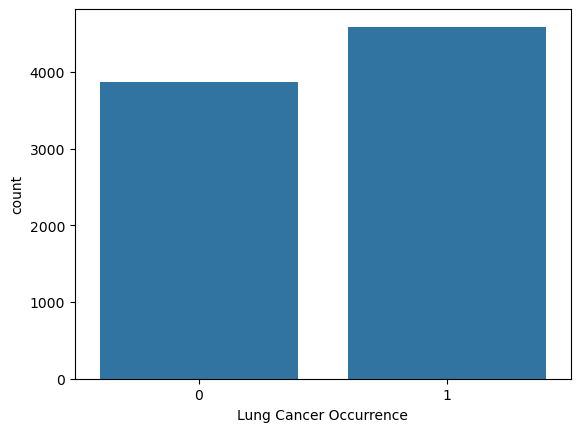

In [39]:
sns.countplot(x='Lung Cancer Occurrence',data=df)
plt.show()

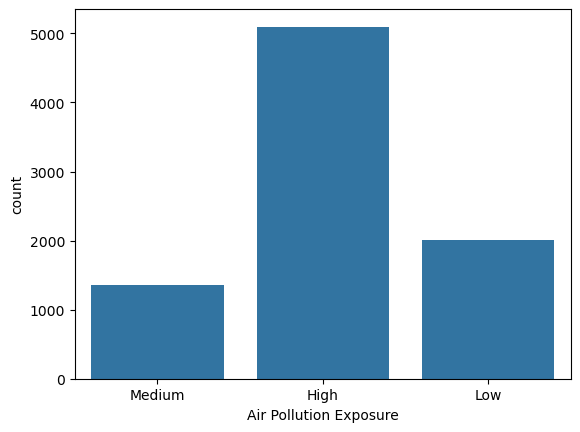

In [40]:
sns.countplot(x='Air Pollution Exposure',data=df)
plt.show()

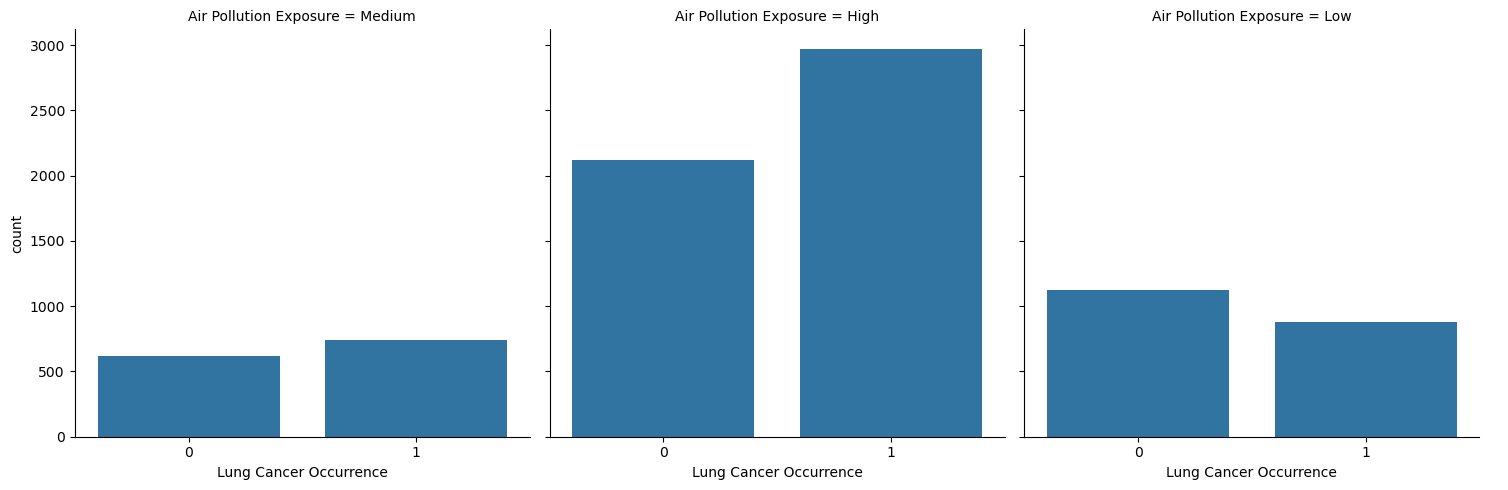

In [41]:
sns.catplot(x='Lung Cancer Occurrence', col='Air Pollution Exposure',kind='count', data=df)
# high and medium have high rate lung cancer occurence

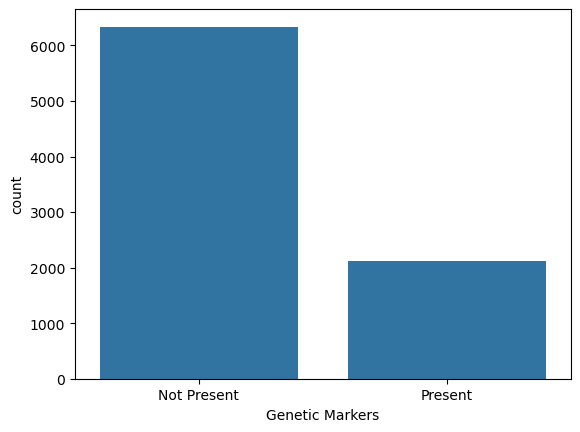

In [42]:
sns.countplot(x='Genetic Markers',data=df)
plt.show()

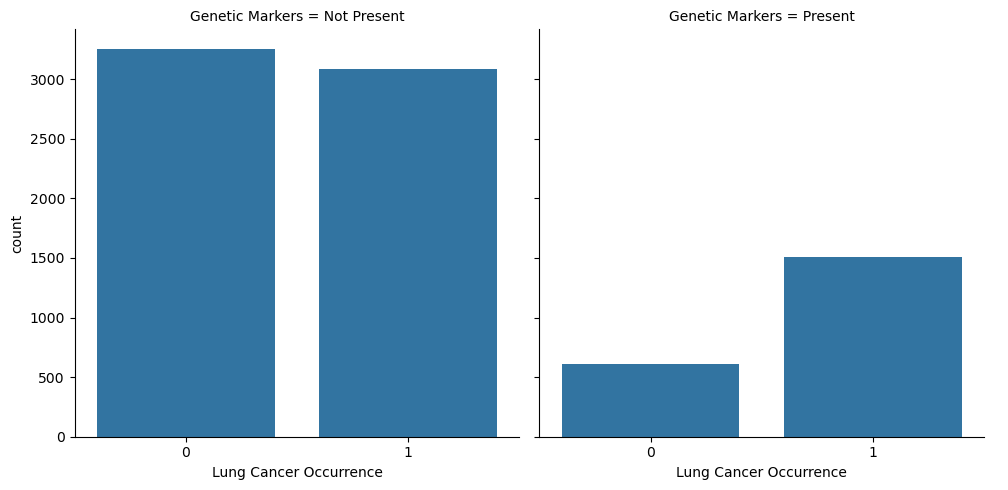

In [43]:
sns.catplot(x='Lung Cancer Occurrence', col='Genetic Markers',kind='count', data=df)
# Genetic Marker somewhat matter

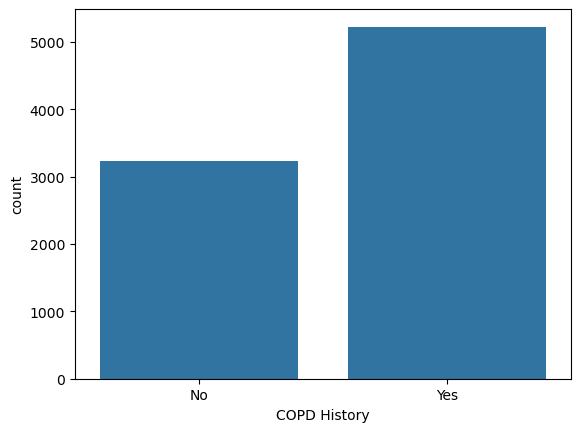

In [44]:
sns.countplot(x='COPD History',data=df)
plt.show()

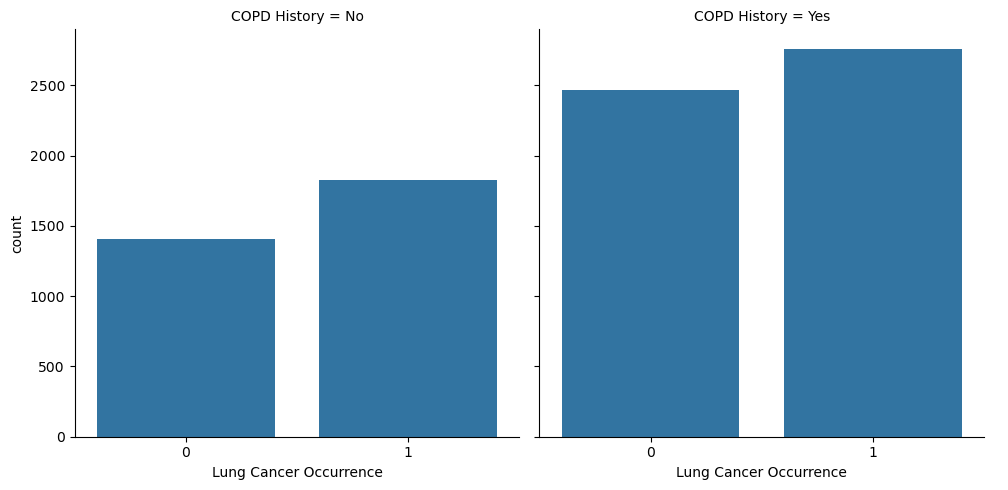

In [45]:
sns.catplot(x='Lung Cancer Occurrence', col='COPD History',kind='count', data=df)
# COPD History obviously does not matter

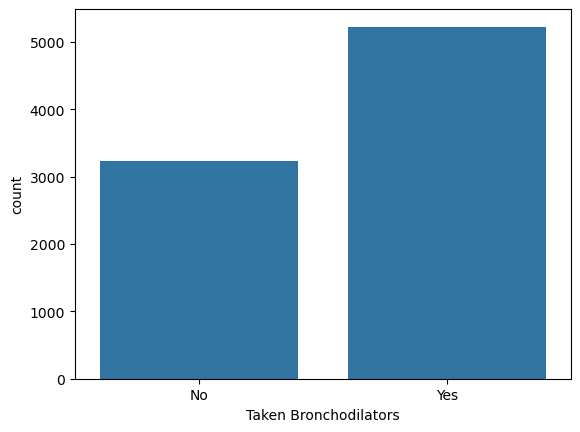

In [46]:
sns.countplot(x='Taken Bronchodilators',data=df)
plt.show()

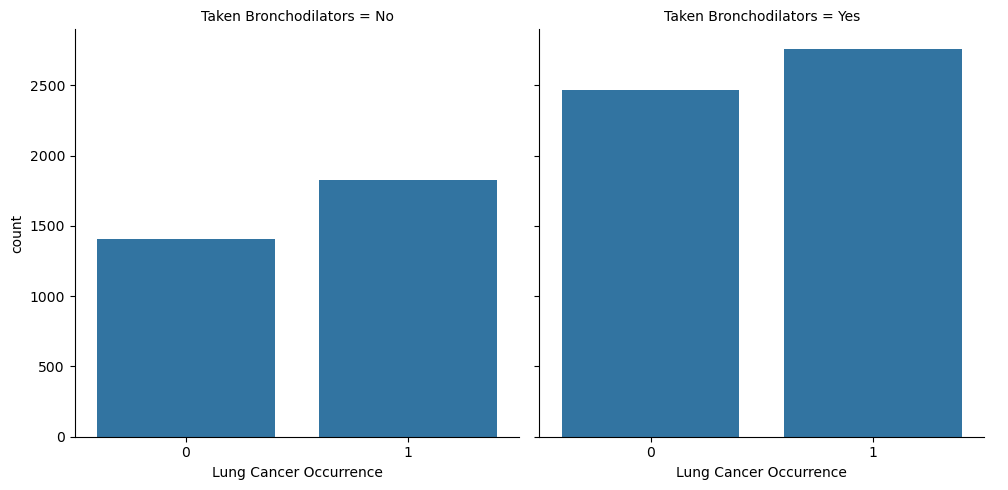

In [47]:
sns.catplot(x='Lung Cancer Occurrence', col='Taken Bronchodilators',kind='count', data=df)
# Taken Bronchodilators also obviously does not matter

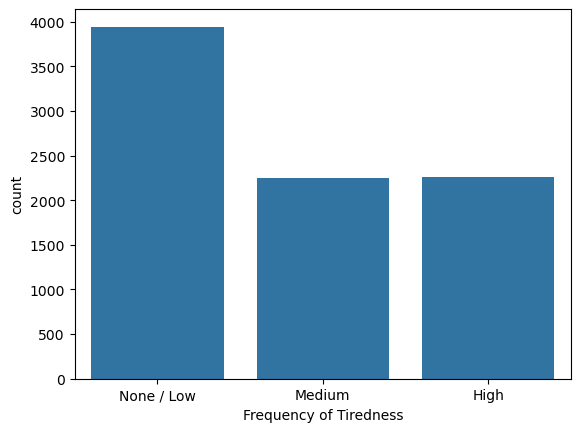

In [48]:
sns.countplot(x='Frequency of Tiredness',data=df)
plt.show()

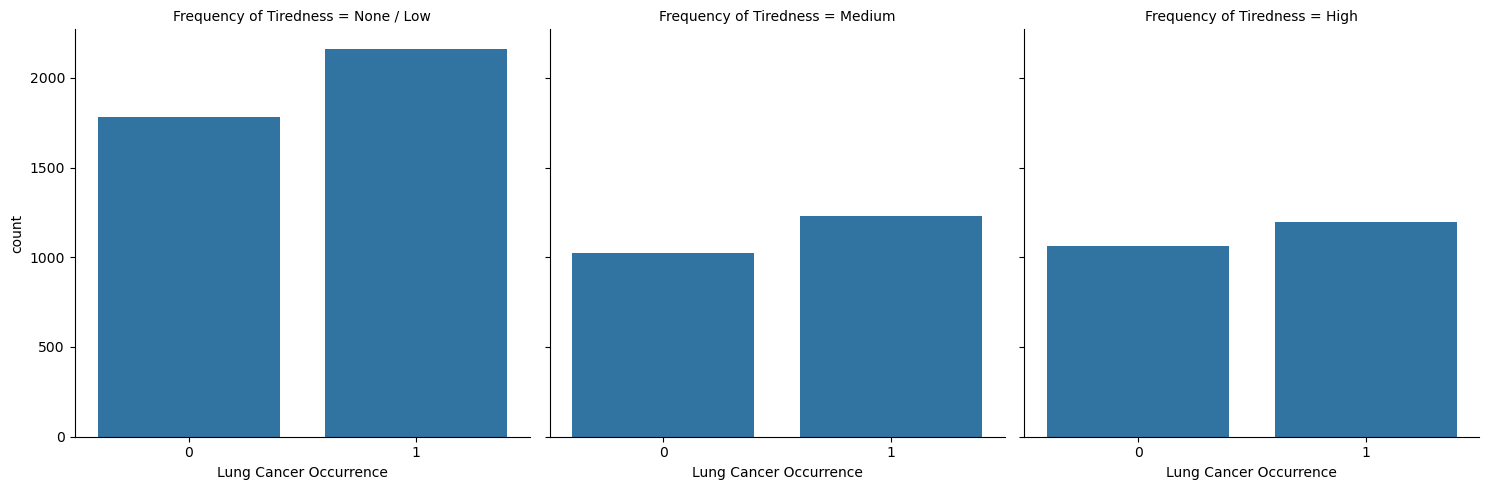

In [49]:
sns.catplot(x='Lung Cancer Occurrence', col='Frequency of Tiredness',kind='count', data=df)
# also does not matter

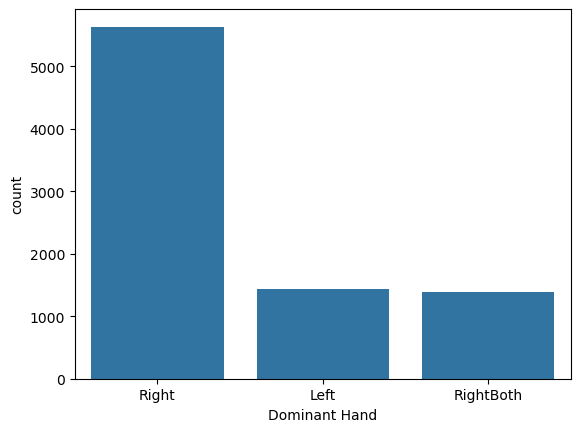

In [50]:
sns.countplot(x='Dominant Hand',data=df)
plt.show()

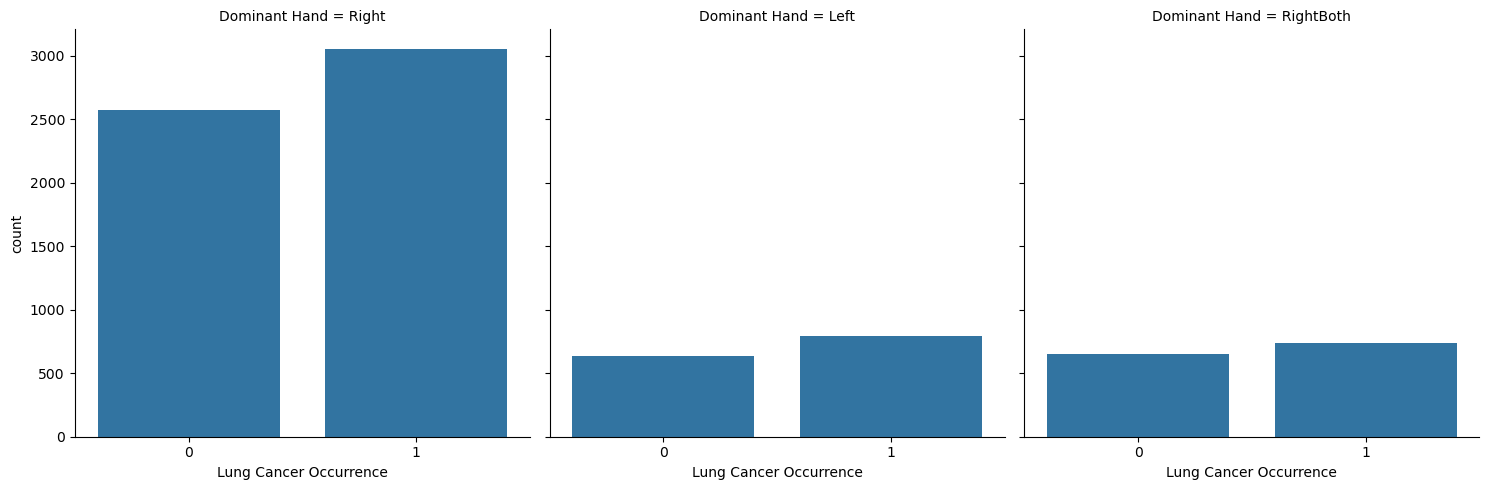

In [51]:
sns.catplot(x='Lung Cancer Occurrence', col='Dominant Hand',kind='count', data=df)
# also does not matter

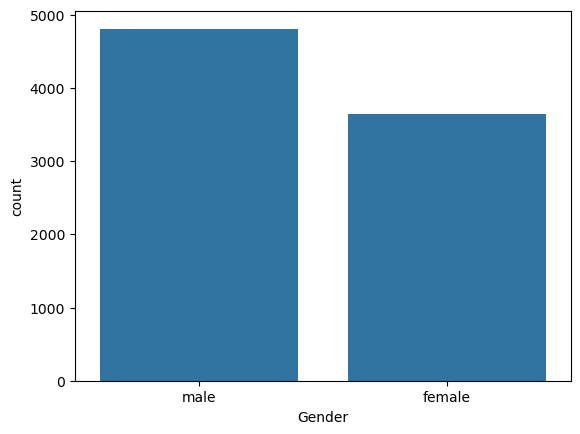

In [52]:
sns.countplot(x='Gender',data=df)
plt.show()

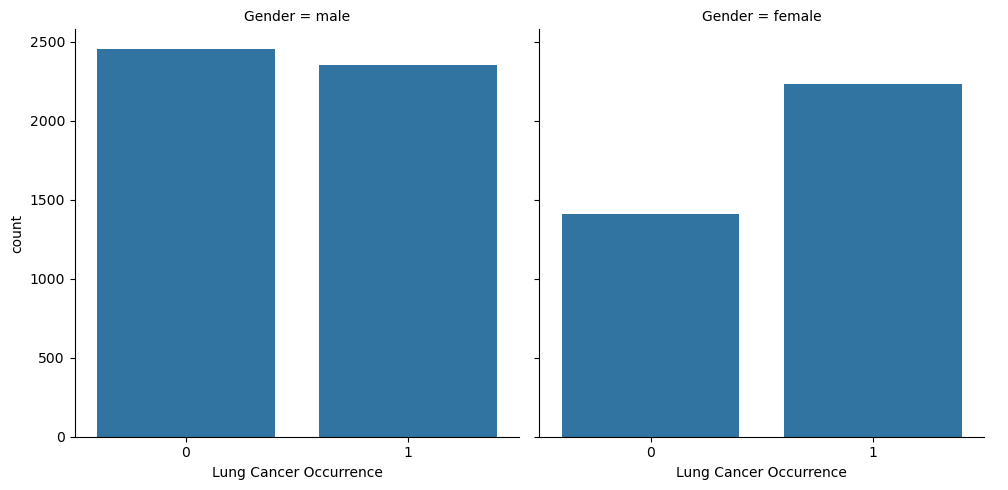

In [53]:
sns.catplot(x='Lung Cancer Occurrence', col='Gender',kind='count', data=df)
# somewhat gender matter, which I feel is very wrong

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8457 entries, 0 to 10346
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     8457 non-null   int32 
 1   Gender                  8457 non-null   object
 2   COPD History            8457 non-null   object
 3   Genetic Markers         8457 non-null   object
 4   Air Pollution Exposure  8457 non-null   object
 5   Current Weight          8457 non-null   int32 
 6   Taken Bronchodilators   8457 non-null   object
 7   Frequency of Tiredness  8457 non-null   object
 8   Dominant Hand           8457 non-null   object
 9   Lung Cancer Occurrence  8457 non-null   int64 
 10  Weight Gain Or Loss     8457 non-null   int32 
 11  Smoke Duration          8457 non-null   int32 
dtypes: int32(4), int64(1), object(7)
memory usage: 726.8+ KB


In [55]:
df = df.drop(columns=['COPD History', 'Taken Bronchodilators','Frequency of Tiredness','Dominant Hand'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8457 entries, 0 to 10346
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     8457 non-null   int32 
 1   Gender                  8457 non-null   object
 2   Genetic Markers         8457 non-null   object
 3   Air Pollution Exposure  8457 non-null   object
 4   Current Weight          8457 non-null   int32 
 5   Lung Cancer Occurrence  8457 non-null   int64 
 6   Weight Gain Or Loss     8457 non-null   int32 
 7   Smoke Duration          8457 non-null   int32 
dtypes: int32(4), int64(1), object(3)
memory usage: 462.5+ KB


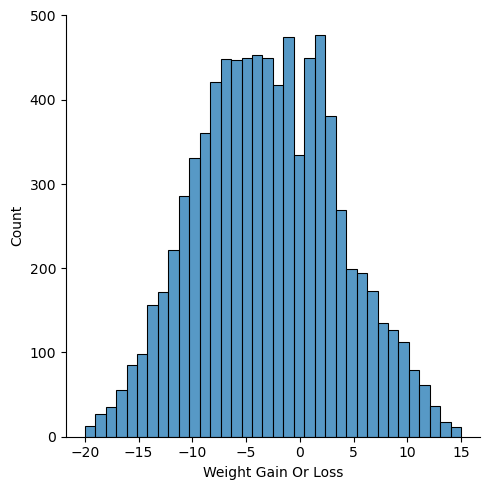

In [57]:
sns.displot(df['Weight Gain Or Loss'])

<Axes: xlabel='Lung Cancer Occurrence', ylabel='Weight Gain Or Loss'>

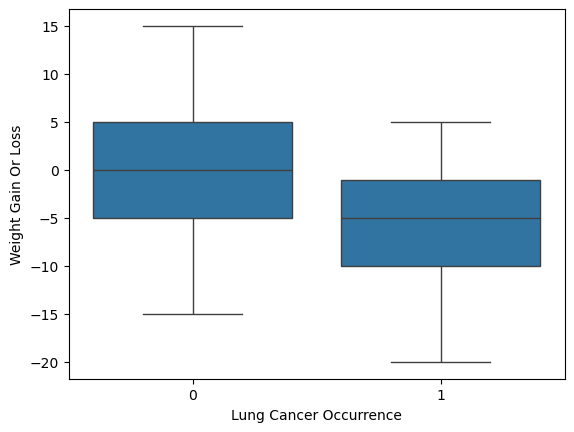

In [58]:
sns.boxplot(x='Lung Cancer Occurrence', y='Weight Gain Or Loss',data=df)
# cancer mostly will have weight loss

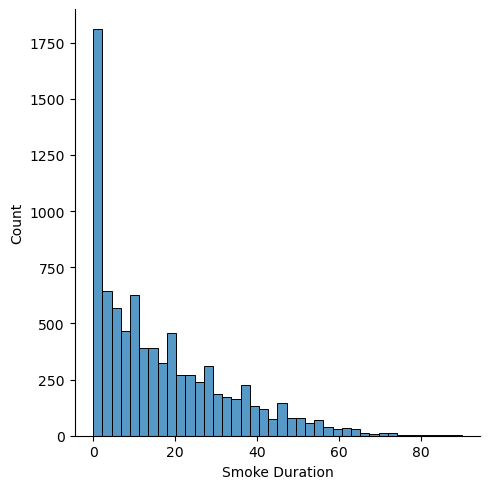

In [59]:
sns.displot(df['Smoke Duration'])

<Axes: xlabel='Lung Cancer Occurrence', ylabel='Smoke Duration'>

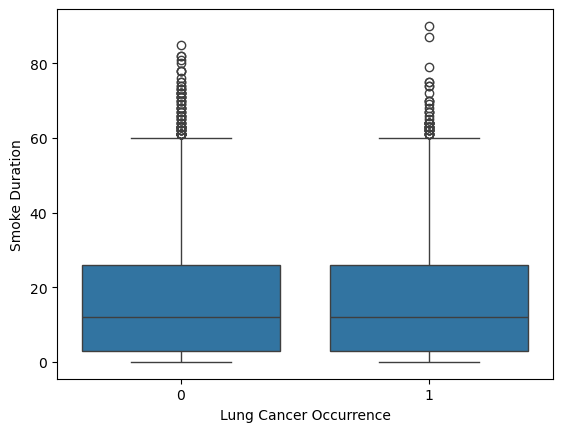

In [60]:
sns.boxplot(x='Lung Cancer Occurrence', y='Smoke Duration',data=df)
# from this cannot tell much as it about same

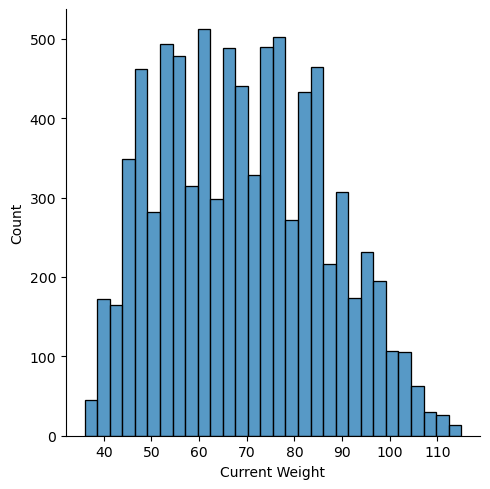

In [61]:
sns.displot(df['Current Weight'])

<Axes: xlabel='Lung Cancer Occurrence', ylabel='Current Weight'>

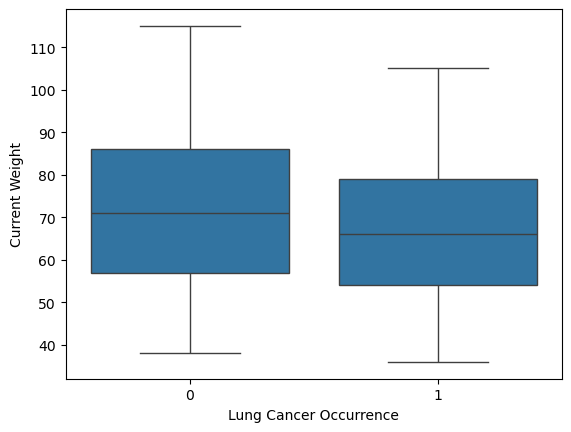

In [62]:
sns.boxplot(x='Lung Cancer Occurrence', y='Current Weight',data=df)
# weight about same, but people who have cancer mostly weight somewhat lower.

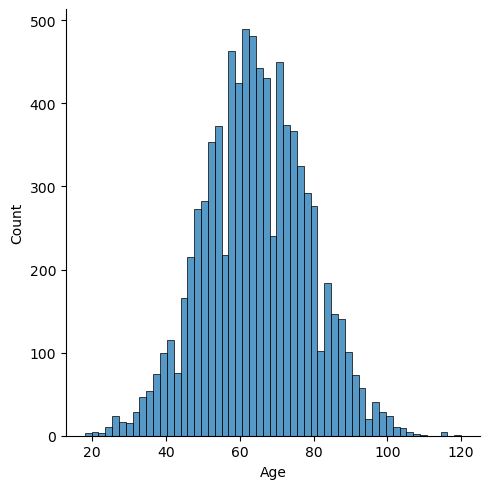

In [63]:
sns.displot(df['Age'])

<Axes: xlabel='Lung Cancer Occurrence', ylabel='Age'>

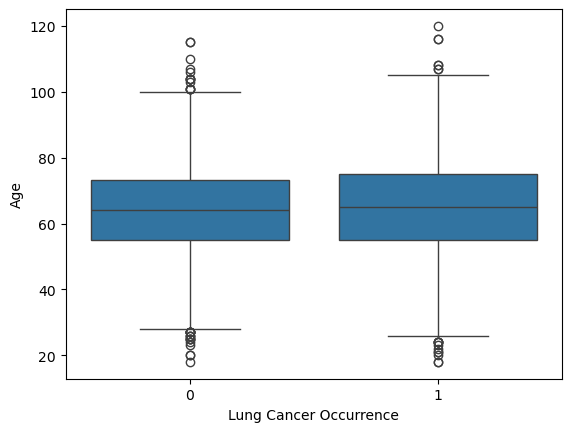

In [64]:
sns.boxplot(x='Lung Cancer Occurrence', y='Age',data=df)
#age about same, people who have cancer have are somewhat higher age.

### convert categories feature to numerical one hot encoder

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8457 entries, 0 to 10346
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     8457 non-null   int32 
 1   Gender                  8457 non-null   object
 2   Genetic Markers         8457 non-null   object
 3   Air Pollution Exposure  8457 non-null   object
 4   Current Weight          8457 non-null   int32 
 5   Lung Cancer Occurrence  8457 non-null   int64 
 6   Weight Gain Or Loss     8457 non-null   int32 
 7   Smoke Duration          8457 non-null   int32 
dtypes: int32(4), int64(1), object(3)
memory usage: 462.5+ KB


In [66]:
df2 = df

In [67]:
df2['Gender'].unique()

array(['male', 'female'], dtype=object)

In [68]:
df2['Gender'] = df2['Gender'].map({'male': 1, 'female': 0})
df2['Gender'].unique()

array([1, 0], dtype=int64)

In [69]:
df2['Genetic Markers'].unique()

array(['Not Present', 'Present'], dtype=object)

In [70]:
df2['Genetic Markers'] = df2['Genetic Markers'].map({'Present': 1, 'Not Present': 0})
df2['Genetic Markers'].unique()

array([0, 1], dtype=int64)

In [71]:
df2['Air Pollution Exposure'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [72]:
df2['Air Pollution Exposure'] = df2['Air Pollution Exposure'].map({'Low': 0, 'Medium': 0.5, 'High': 1})
df2['Air Pollution Exposure'].unique()

array([0.5, 1. , 0. ])

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8457 entries, 0 to 10346
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     8457 non-null   int32  
 1   Gender                  8457 non-null   int64  
 2   Genetic Markers         8457 non-null   int64  
 3   Air Pollution Exposure  8457 non-null   float64
 4   Current Weight          8457 non-null   int32  
 5   Lung Cancer Occurrence  8457 non-null   int64  
 6   Weight Gain Or Loss     8457 non-null   int32  
 7   Smoke Duration          8457 non-null   int32  
dtypes: float64(1), int32(4), int64(3)
memory usage: 462.5 KB


<Axes: >

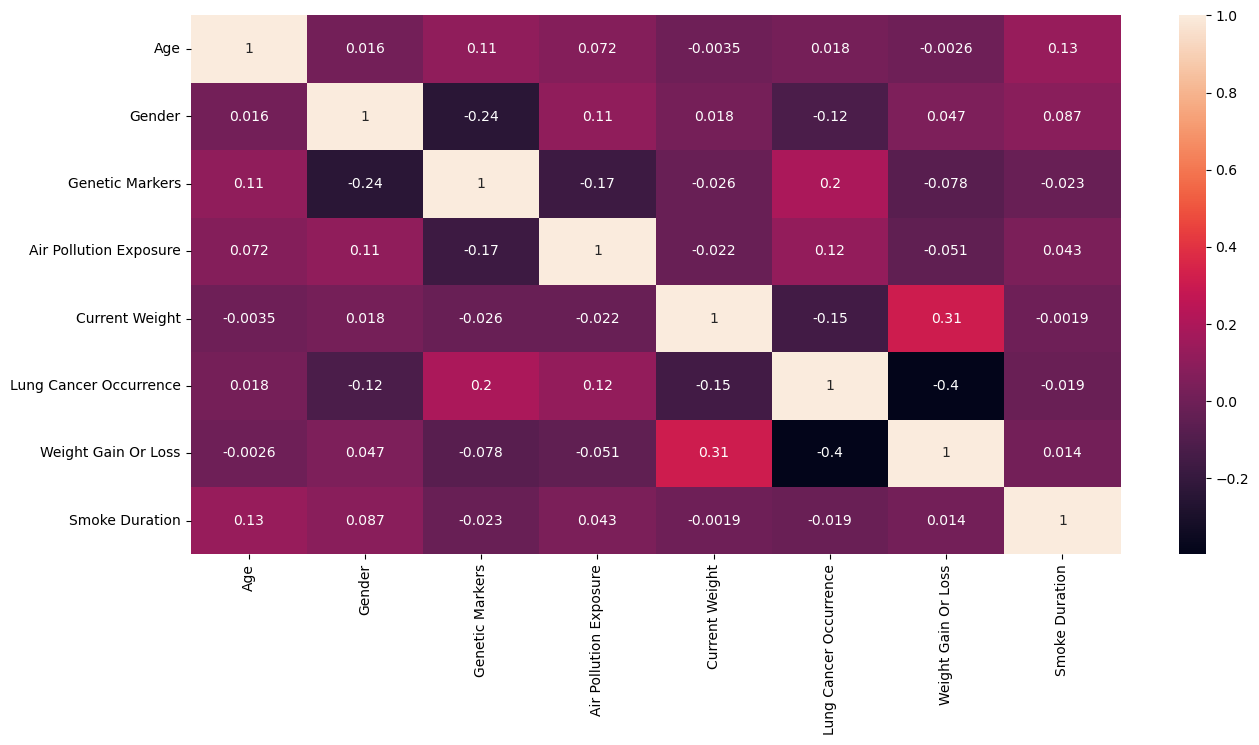

In [74]:
cor_mat=df2.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [ ]:
sns.pairplot(df)

## Conclusion

Weight Loss seems the best to conclude whether the person has lung cancer or not, the second will be either air pollution or Genetic Marker. 

The smoking duration data from start and stop smoking years are not in accurate as some of the data the smoking duration number is largest than the age, thus it lost the accuracy. The gender seems unknown to me because from the record females have a higher chance of getting lung cancer, which I still don't believe it. The current weight somehow links with the weight loss. 

The other feature provided such COPD History, Taken Bronchodilators, Dominant Hand as from the above analysis does not matter at all. The Frequency of Tiredness 